In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
rd=pd.read_csv('/content/drive/MyDrive/internship/dataset.csv')
df=pd.DataFrame(rd)
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,337.000000,342.000000,342.000000,342.000000
mean,43.876855,17.151170,200.915205,4273.976608
std,5.478600,1.974793,14.061714,1119.229602
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.100000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,15000.000000


Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it

Explanation:Performed df.isnull().sum() as found number of null values in each column and replaced them with median for the bill_length_mm,bill_depth_mm,flipper_length_mm,
body_mass_g,columns and replaced the null values for sex using the mode values, for preprocessing i have used label encoder.

In [ ]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,7
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,16


In [ ]:
data=df.copy()
missing_data = data.isnull().sum()

data['bill_length_mm'].fillna(data['bill_length_mm'].median(), inplace=True)
data['bill_depth_mm'].fillna(data['bill_depth_mm'].median(), inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].median(), inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].median(), inplace=True)

data['sex'].fillna(data['sex'].mode()[0], inplace=True)

cleaned_missing_data = data.isnull().sum()

missing_data, cleaned_missing_data

(species               0
 island                0
 bill_length_mm        7
 bill_depth_mm         2
 flipper_length_mm     2
 body_mass_g           2
 sex                  16
 dtype: int64,
 species              0
 island               0
 bill_length_mm       0
 bill_depth_mm        0
 flipper_length_mm    0
 body_mass_g          0
 sex                  0
 dtype: int64)

In [ ]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,44.1,17.3,197.0,4050.0,male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['sex_encoded'] = le.fit_transform(data['sex'])
data=data.drop(columns=['sex'])
data.head()



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_encoded
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
3,Adelie,Torgersen,44.1,17.3,197.0,4050.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0


Q2: What is the average body_mass_g for Gentoo penguins? (code)


In [ ]:
main_data=data[data['species'] == 'Gentoo']
mean_data=np.mean(main_data['body_mass_g'])
print(f"The average body mass for Gentoo penguins is: {mean_data}")

The average body mass for Gentoo penguins is: 5125.0


Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species.

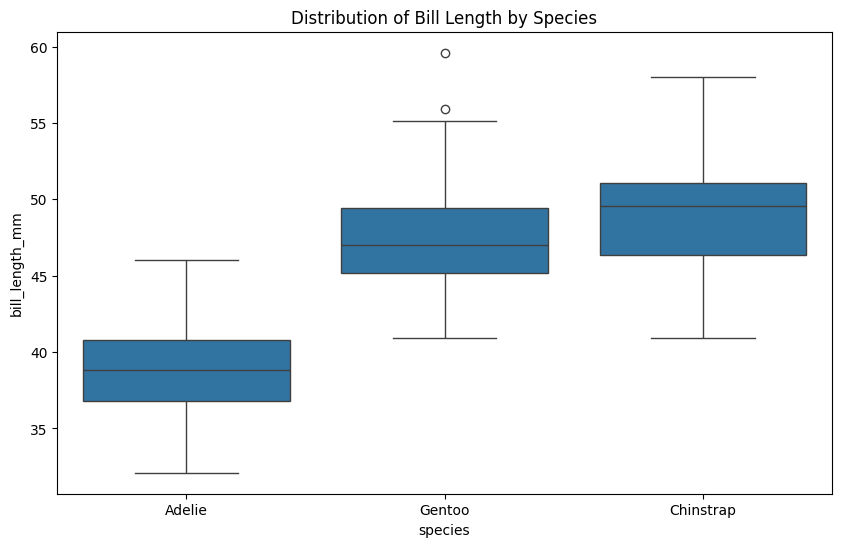

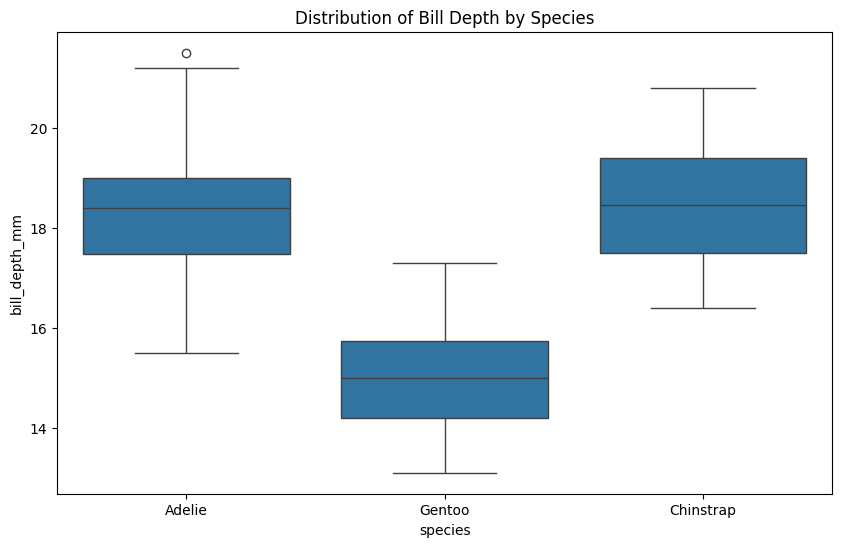

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='bill_length_mm', data=data)
plt.title('Distribution of Bill Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='bill_depth_mm', data=data)
plt.title('Distribution of Bill Depth by Species')
plt.show()




In [ ]:

penguin_species=data['species'].unique()
for species in penguin_species:
  species_data = data[data['species'] == species]
  bill_length_skewness = species_data['bill_length_mm'].skew()
  bill_length_kurtosis = species_data['bill_length_mm'].kurt()
  bill_depth_skewness = species_data['bill_depth_mm'].skew()
  bill_depth_kurtosis = species_data['bill_depth_mm'].kurt()

  print(f"\nSpecies: {species}")
  print(f"Bill Length Skewness: {bill_length_skewness:.2f}")
  print(f"Bill Length Kurtosis: {bill_length_kurtosis:.2f}")
  print(f"Bill Depth Skewness: {bill_depth_skewness:.2f}")
  print(f"Bill Depth Kurtosis: {bill_depth_kurtosis:.2f}")




Species: Adelie
Bill Length Skewness: 0.17
Bill Length Kurtosis: -0.19
Bill Depth Skewness: 0.33
Bill Depth Kurtosis: -0.06

Species: Gentoo
Bill Length Skewness: 0.73
Bill Length Kurtosis: 1.28
Bill Depth Skewness: 0.35
Bill Depth Kurtosis: -0.56

Species: Chinstrap
Bill Length Skewness: -0.10
Bill Length Kurtosis: -0.03
Bill Depth Skewness: 0.01
Bill Depth Kurtosis: -0.87


Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers.

Explanation: Here we used IQR method to findout the outliers for 4 columns and there are any outliers it will print the outliers and we used boxplot to visuvalize the outliers.

In [ ]:


def find_outliers(data, column, lower_bound, upper_bound):
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

data_columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for column in data_columns:
  # Using IQR method to detect outliers
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR


  outliers = find_outliers(data, column, lower_bound, upper_bound)
  if not outliers.empty:
    print(f"Outliers found in '{column}':")
    print(outliers[[column]])
  else:
    print(f"No outliers found in '{column}'")


No outliers found in 'bill_length_mm'
No outliers found in 'bill_depth_mm'
No outliers found in 'flipper_length_mm'
Outliers found in 'body_mass_g':
     body_mass_g
73       15000.0
206      12000.0
324      10000.0


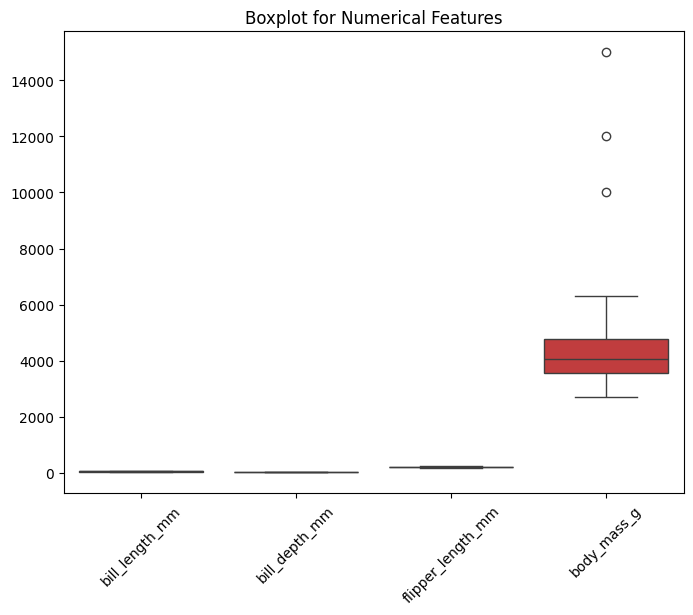

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
plt.title('Boxplot for Numerical Features')
plt.xticks(rotation=45)
plt.show()


Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA.

Explanation: Here we used funcion PCA and standardScaler here we check the variance ratio and the sum of variance of the features Is greater than the 0.95 here we can perform PCA.

In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_checker(X):
  x = StandardScaler().fit_transform(X)

  pca = PCA()
  pca.fit(x)
  explained_variance_ratio = pca.explained_variance_ratio_

  print("Explained variance ratio:", explained_variance_ratio)

  if len(numerical_features) > 2 and explained_variance_ratio[0] + explained_variance_ratio[1] < 0.95:
    print("PCA can be performed to reduce dimensionality.")
  else:
    print("PCA may not be necessary for dimensionality reduction in this dataset.")


numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = data[numerical_features]
pca_checker(X)


Explained variance ratio: [0.61711071 0.19733481 0.13246195 0.05309253]
PCA can be performed to reduce dimensionality.


In [ ]:

def pca_perform(X):
  x = StandardScaler().fit_transform(X)

  pca = PCA()
  pca.fit(x)
  explained_variance_ratio = pca.explained_variance_ratio_

  print("Explained variance ratio:", explained_variance_ratio)

  if len(numerical_features) > 3 and explained_variance_ratio[0] + explained_variance_ratio[1] +explained_variance_ratio[2] < 0.95:
    print("PCA can be performed to reduce dimensionality.")
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)
    print(principalDf.head())
  else:
    print("PCA may not be necessary for dimensionality reduction in this dataset.")



X = data[numerical_features]
for i in range(3,5):
  print(f"Number of components: {i}")
  pca = PCA(n_components=i)
  principalComponents = pca.fit_transform(X)
  principalDf = pd.DataFrame(data = principalComponents)
  pca_perform(principalDf)
  print('************')




Number of components: 3
Explained variance ratio: [0.33333333 0.33333333 0.33333333]
PCA may not be necessary for dimensionality reduction in this dataset.
************
Number of components: 4
Explained variance ratio: [0.25 0.25 0.25 0.25]
PCA can be performed to reduce dimensionality.
          0         1         2
0 -0.378727 -0.270291 -1.394807
1 -0.086103 -0.244392 -1.223609
2 -0.506748 -0.949733  0.206218
3  0.267355 -0.165733 -0.285419
4 -1.727861 -0.773681  0.332847
************


Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them.

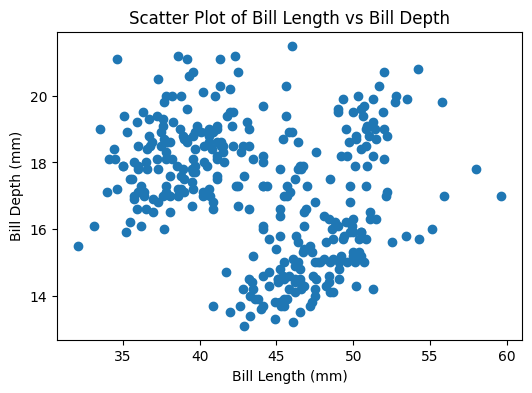

In [ ]:

# 1. Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(data['bill_length_mm'], data['bill_depth_mm'])
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Scatter Plot of Bill Length vs Bill Depth')
plt.show()


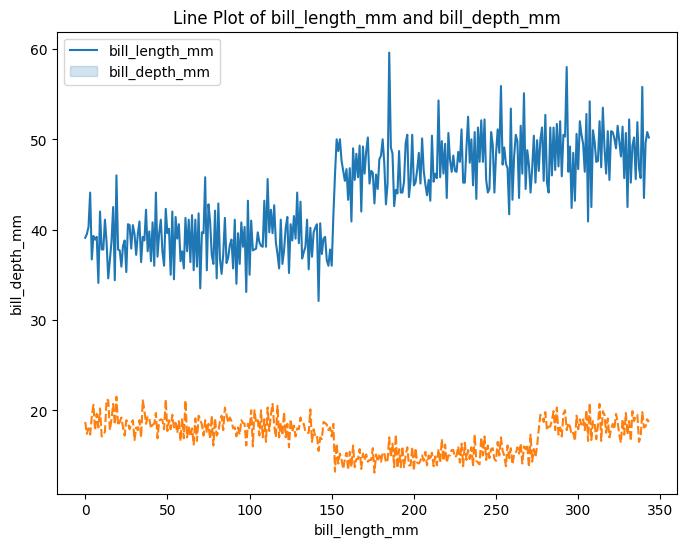

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=data[['bill_length_mm', 'bill_depth_mm']])
plt.title('Line Plot of bill_length_mm and bill_depth_mm')
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.legend(['bill_length_mm', 'bill_depth_mm'])
plt.show()


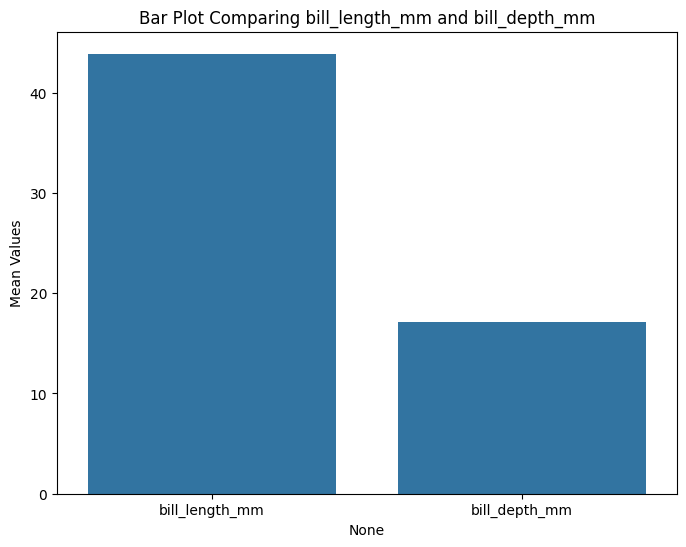

In [ ]:
data_mean = data[['bill_length_mm', 'bill_depth_mm']].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=data_mean.index, y=data_mean.values)
plt.title('Bar Plot Comparing bill_length_mm and bill_depth_mm')
plt.ylabel('Mean Values')
plt.show()


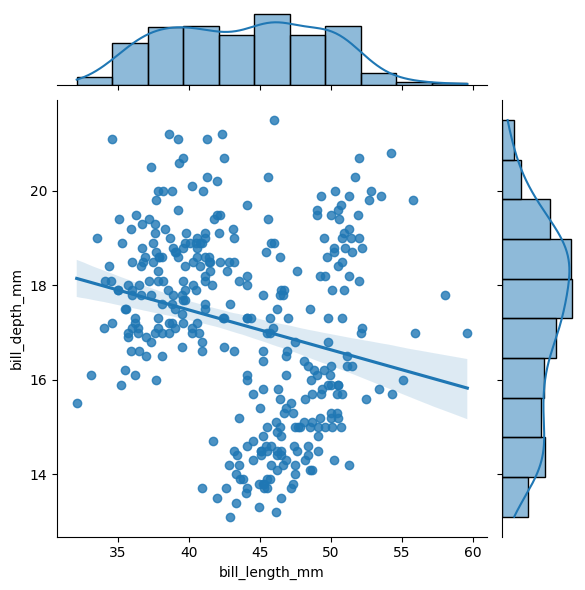

In [ ]:

sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=data, kind='reg')
plt.show()

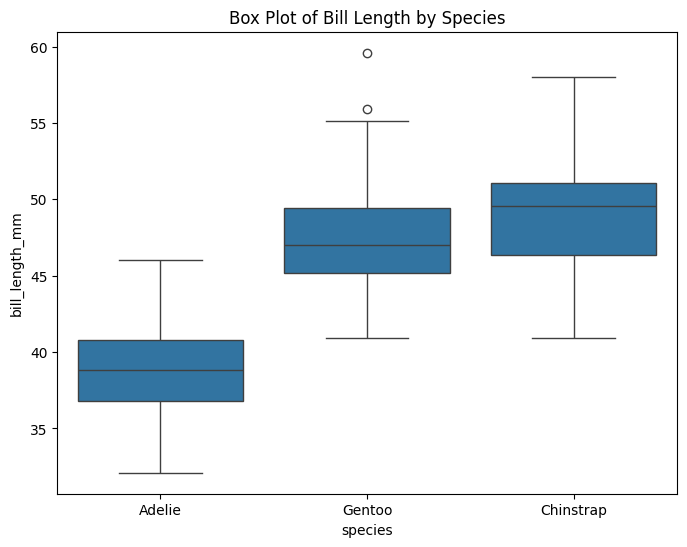

In [ ]:
# 5.
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='bill_length_mm', data=data)
plt.title('Box Plot of Bill Length by Species')
plt.show()

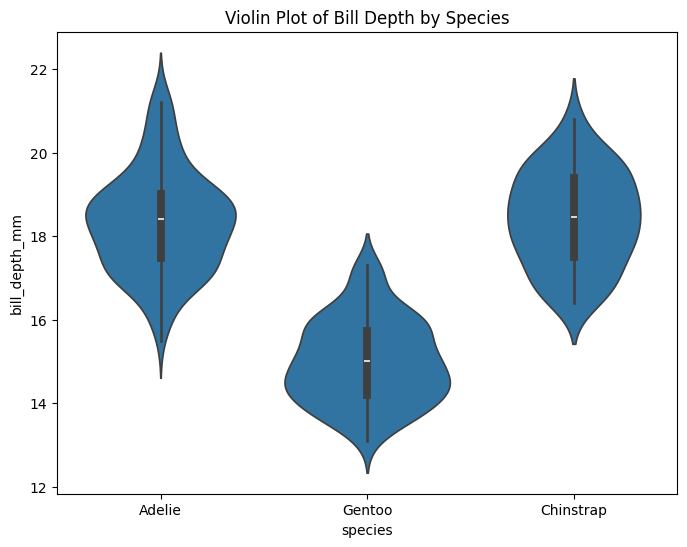

In [ ]:
# 6. Violin plot (by species)
plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='bill_depth_mm', data=data)
plt.title('Violin Plot of Bill Depth by Species')
plt.show()

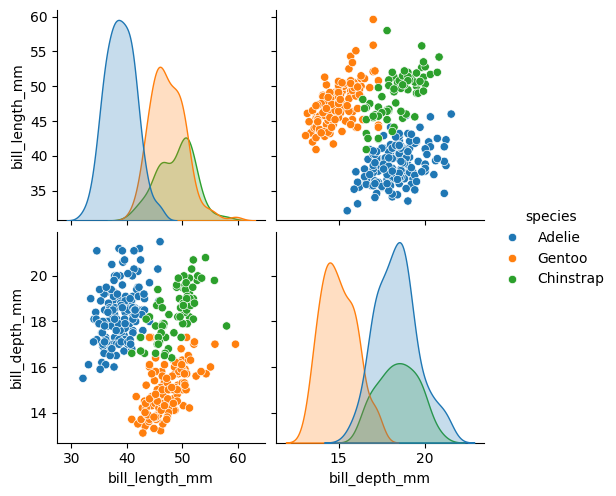

In [ ]:
# 7. Pair plot (including other numerical features)
sns.pairplot(data, vars=['bill_length_mm', 'bill_depth_mm'], hue='species')
plt.show()

Q7:Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island?

In [ ]:

grouped_data = data.groupby(['species', 'island'])
max_flipper_length = {}

for (species, island), group in grouped_data:
    max_length = None
    for length in group['flipper_length_mm']:
        if max_length is None or length > max_length:
            max_length = length
    max_flipper_length[(species, island)] = max_length

print("Maximum flipper length for each species and island:")
for key, flipper_length in max_flipper_length.items():
    print(f"Species: {key[0]}, Island: {key[1]}, Max flipper length: {flipper_length}")

longest_flippers = {}
for (species, island), length in max_flipper_length.items():
    if island not in longest_flippers or length > longest_flippers[island]['flipper_length_mm']:
        longest_flippers[island] = {'species': species, 'flipper_length_mm': length}

print("\nSpecies with the longest flippers on each island:")
for island, info in longest_flippers.items():
    print(f"Island: {island}, Species: {info['species']}, Max flipper length: {info['flipper_length_mm']}")


Maximum flipper length for each species and island:
Species: Adelie, Island: Biscoe, Max flipper length: 203.0
Species: Adelie, Island: Dream, Max flipper length: 208.0
Species: Adelie, Island: Torgersen, Max flipper length: 210.0
Species: Chinstrap, Island: Dream, Max flipper length: 212.0
Species: Gentoo, Island: Biscoe, Max flipper length: 231.0

Species with the longest flippers on each island:
Island: Biscoe, Species: Gentoo, Max flipper length: 231.0
Island: Dream, Species: Chinstrap, Max flipper length: 212.0
Island: Torgersen, Species: Adelie, Max flipper length: 210.0


Q8: Perform z-score normalization on this dataset.

In [ ]:

from sklearn.preprocessing import StandardScaler

numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler()
Normalized_data= scaler.fit_transform(data[numerical_features])
Normalized_data = pd.DataFrame(Normalized_data, columns=numerical_features)
Normalized_data.head(5)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.883054,0.787289,-1.420541,-0.468990
1,-0.809180,0.126114,-1.063485,-0.424125
2,-0.661432,0.431272,-0.420786,-0.917634
3,0.040373,0.075255,-0.277964,-0.199803
4,-1.326299,1.092447,-0.563608,-0.738176
